Will Hetfield

Project Luther

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle
%matplotlib inline

In [3]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_squared_error

from scipy import stats

In [53]:
import luther_clean

#### Next two cell are commented out. Running would do the scraping and cleaning from baseball-reference website.  Alternatively, two cells down can simply load pickled data

In [147]:
#Scrape baseball reference, create dictionary of dataframes, clean and combine into one dataframe
#Create one dataframe from dictionary of dataframes
"""
hof_df_dict = luther_clean.create_dataframe_dict()
hof_df = luther_clean.create_analysis_df(hof_df_dict)
""

/Users/whetfield/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/whetfield/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [149]:
#rename columns for pitcher statistics
#Set Player Names to Index and Clean Up Index Names

"""
hof_df.columns = ['Rk', 'Name', 'YoB', 'Votes', '%vote', 'HOFm', 'HOFs', 'Yrs', 'WAR', 
                  'WAR7', 'JAWS', 'Jpos', 'G', 'AB', 'R', 'H', 'HR', 'RBI', 'SB', 'BB',
                  'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'P_W', 'P_L', 'P_ERA', 'P_ERA+', 'P_WHIP', 'P_G', 
                  'P_GS', 'P_SV', 'P_IP', 'P_H', 'P_HR', 'P_BB', 'P_SO', 'Pos Summary', 'Year_of_Vote']


hof_df.set_index('Name', inplace= True)
""""""

#### Can do start from here with pickled file in repo

In [28]:
with open("final_Luther2.pkl", 'rb') as picklefile: 
    hof_df = pickle.load(picklefile)

hof_df.index = hof_df.index.map(lambda x : x.replace("HOF",""))
hof_df.index = hof_df.index.map(lambda x : x.replace("X-",""))
hof_df.index = hof_df.index.map(lambda x : x.strip())

In [29]:
hof_df.describe()


,Rk,Votes,%vote,HOFm,HOFs,Yrs,WAR,WAR7,JAWS,Jpos,...,P_WHIP,P_G,P_GS,P_SV,P_IP,P_H,P_HR,P_BB,P_SO,Year_of_Vote
count,665.000000,665.000000,665.000000,665.00000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,...,56.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,665.000000
mean,40.178947,37.320301,9.173985,68.82406,29.418045,15.675188,39.467368,29.071278,34.269774,54.588271,...,1.817821,18.913793,13.896552,0.500000,124.501724,118.879310,2.568966,51.741379,56.448276,1977.983459
std,30.089618,98.796240,22.699569,70.61309,14.815420,3.357208,23.624074,11.744319,17.498219,4.086012,...,1.041827,54.987171,46.730917,1.635677,411.597502,400.402915,10.535008,163.118788,185.693595,27.514203
min,1.000000,0.000000,0.000000,0.00000,0.000000,7.000000,10.100000,9.800000,10.100000,43.900000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1936.000000
25%,22.000000,1.000000,0.200000,22.00000,19.000000,13.000000,23.200000,20.800000,22.000000,54.600000,...,1.127500,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.250000,0.000000,1949.000000
50%,31.000000,2.000000,0.700000,45.00000,26.000000,16.000000,34.500000,27.400000,31.300000,55.200000,...,1.580000,1.500000,0.000000,0.000000,2.000000,3.000000,0.000000,1.500000,1.000000,1983.000000
75%,50.000000,9.000000,3.000000,90.00000,37.000000,18.000000,49.600000,35.800000,42.500000,57.900000,...,2.009000,4.000000,1.000000,0.000000,14.275000,13.000000,1.000000,6.750000,6.000000,2003.000000
max,149.000000,537.000000,99.300000,452.00000,79.000000,25.000000,163.100000,84.700000,123.900000,62.100000,...,5.000000,299.000000,266.000000,10.000000,2389.100000,2552.000000,76.000000,906.000000,989.000000,2018.000000


In [30]:
#create steroids value
hof_df.loc[ : , 'Steroids'] = np.array([0] * len (hof_df))  
steroids_list = ['Roger Clemens', 'Barry Bonds', 'Manny Ramirez', "Gary Sheffield", "Sammy Sosa", "Ivan Rodriguez",
                'Jeff Bagwell', 'Mike Piazza', 'Rafael Palmeiro']
hof_df.loc[:,'Steroids'][hof_df.index.isin(steroids_list)] = 1


/Users/whetfield/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


#### Skewed Target Variable!

Going to create a transformed target, inverse of __[logistic sigmoid](https://en.wikipedia.org/wiki/Logistic_function)__ . Picked logistic sigmoid because of capped (can't get above 100%) and floored (can't go below 0% of the vote) nature of the target variable

(array([ 565.,   19.,   14.,   10.,    6.,    5.,    6.,    5.,   13.,   22.]),
 array([  0.  ,   9.93,  19.86,  29.79,  39.72,  49.65,  59.58,  69.51,
         79.44,  89.37,  99.3 ]),
 <a list of 10 Patch objects>)

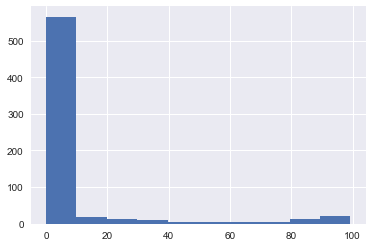

In [32]:
plt.hist(hof_df['%vote'])

In [33]:
#665 records total when including with 0 votes
#546 records when not including 0 votes
#Create a new column with %vote incremented by constant
#Don't want to lose 0% of the vote records, would go to n/a  in transformation

increment_to_vote = 0.2
hof_df['%vote_shift'] = hof_df['%vote'] + increment_to_vote
hof_df['%vote_shift_transformed'] = - np.log((100.2-hof_df['%vote_shift']) / hof_df['%vote_shift'])

In [34]:
#Separate into features and target


X = hof_df.loc[:,['R' , 'H' , 'HR' , 'RBI', 'SB', 'BA', 'OBP','SLG', 'WAR','WAR7','Steroids']]
y_orig = hof_df['%vote']
y_shift = hof_df['%vote_shift']
y_transformed = hof_df['%vote_shift_transformed']

In [35]:
hof_df.loc[['Babe Ruth', 'Kenny Lofton','Barry Bonds'], ['%vote','%vote_shift','%vote_shift_transformed']]

,%vote,%vote_shift,%vote_shift_transformed
Name,,,
Babe Ruth,95.1,95.3,2.967795
Kenny Lofton,3.2,3.4,-3.348872
Barry Bonds,36.2,36.4,-0.561184


(array([ 259.,  188.,   92.,   33.,   31.,   18.,   14.,   16.,   10.,    4.]),
 array([-6.2146081 , -5.09746403, -3.98031996, -2.86317589, -1.74603182,
        -0.62888776,  0.48825631,  1.60540038,  2.72254445,  3.83968852,
         4.95683259]),
 <a list of 10 Patch objects>)

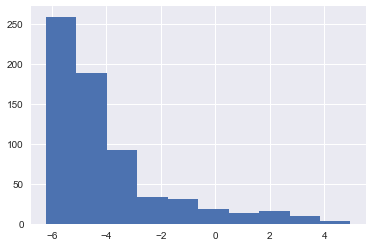

In [36]:
plt.hist(hof_df['%vote_shift_transformed'])

Next, I ran a correlation matrix on all the variables.  Some very high correlations.  This makes sense as some variables directly flow into the computation of others (ie lots of home runs contribute to a high slugging percentage).  What I do like for a base regression is the correlation between home runs and batting average is quite low, and those are historically the two "headline stats" for a hitter.  Combine that with the SB category in a simple regression, would be interesting to see if that can capture a fair amount 

In [37]:
X.corr()

,R,H,HR,RBI,SB,BA,OBP,SLG,WAR,WAR7,Steroids
R,1.000000,0.921205,0.527969,0.791223,0.499154,0.459837,0.504954,0.462161,0.835503,0.782108,0.186075
H,0.921205,1.000000,0.432719,0.793142,0.406182,0.490314,0.334116,0.353400,0.760150,0.696565,0.147824
HR,0.527969,0.432719,1.000000,0.807964,-0.160583,0.035818,0.262718,0.796296,0.520828,0.521302,0.275534
RBI,0.791223,0.793142,0.807964,1.000000,0.064277,0.374157,0.398047,0.730790,0.733324,0.700551,0.222492
SB,0.499154,0.406182,-0.160583,0.064277,1.000000,0.198983,0.135314,-0.161373,0.343059,0.297319,0.024699
BA,0.459837,0.490314,0.035818,0.374157,0.198983,1.000000,0.674546,0.480480,0.456657,0.472385,0.066118
OBP,0.504954,0.334116,0.262718,0.398047,0.135314,0.674546,1.000000,0.570318,0.586163,0.597690,0.117443
SLG,0.462161,0.353400,0.796296,0.730790,-0.161373,0.480480,0.570318,1.000000,0.503677,0.550838,0.197242
WAR,0.835503,0.760150,0.520828,0.733324,0.343059,0.456657,0.586163,0.503677,1.000000,0.952683,0.183217
WAR7,0.782108,0.696565,0.521302,0.700551,0.297319,0.472385,0.597690,0.550838,0.952683,1.000000,0.154360



#### Seaborn pair plots
Using Seaborn pairplots, can look at the bottom row to see individual variable relationships with the vote%.  We can see the relationships are clearly not linear.  Part of the issue is that vote percentage is both capped and floored, a player cannot receive more than 100% of the vote or less than 0%.  But looking at Runs, Hits, and RBI, do believe there is a sigmoid shape.  And there is a clear narrative for one in this case.  We can imagine below a certain ability level a player gets zero votes.  Then gradually over a threshold, more and more voters believe the player should be in the Hall of Fame.  Then at a certain level of ability, there is near unanimous agreement the player should be in the Hall of Fame.

Also note some of the great linear relationships between some of the feature variables!  This will mmake inference on causal relationships very hard.

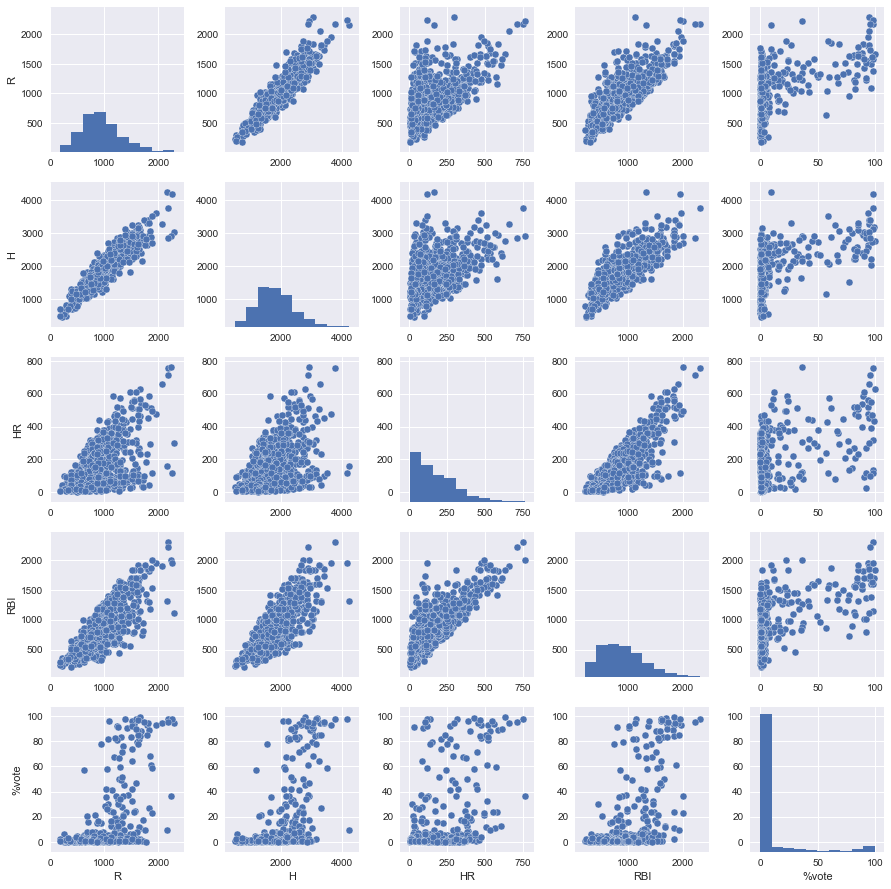

In [38]:
sns.pairplot(hof_df.loc[:,['R', 'H', 'HR', 'RBI', '%vote']])

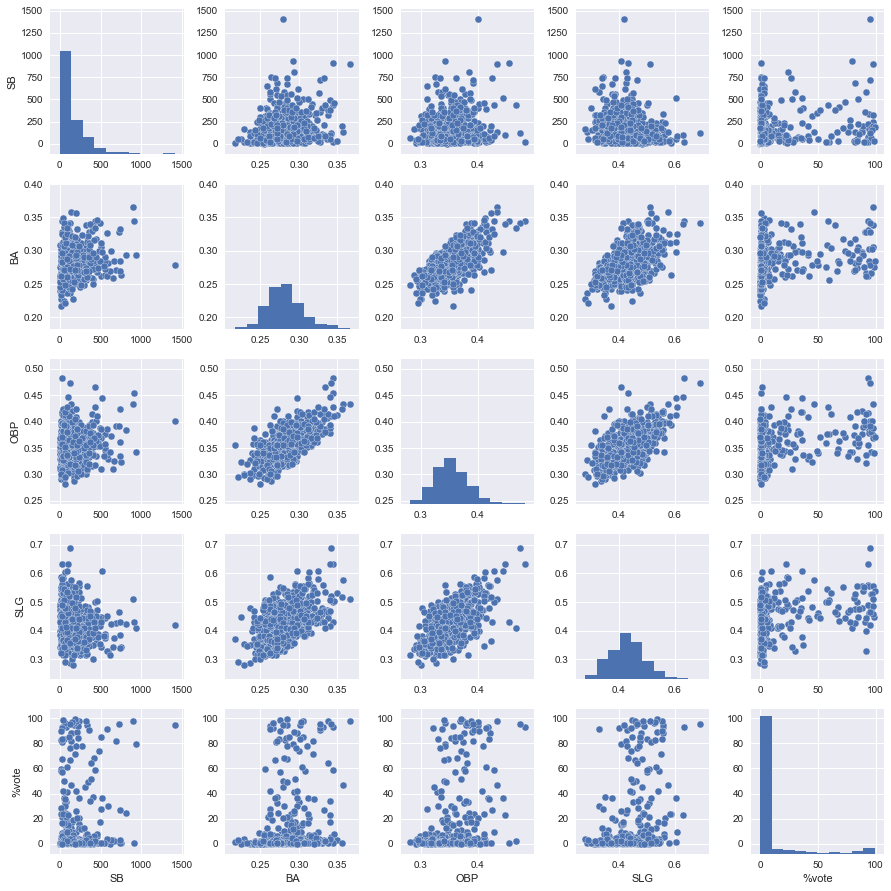

In [20]:
sns.pairplot(hof_df.loc[:,['SB', 'BA', 'OBP', 'SLG', '%vote']])

In [39]:
#All variables show high predictive power in single variable  with original vote% variable
from sklearn import feature_selection
f_values, p_values = feature_selection.f_regression(X, y_orig, center=True)
list(zip(X.columns,f_values, p_values))

[('R', 319.66826569121116, 1.2088324167962459e-58),
 ('H', 293.93100598534011, 8.2353725035256711e-55),
 ('HR', 191.40804427073365, 1.9875444514805068e-38),
 ('RBI', 278.79286158086069, 1.6570605102523394e-52),
 ('SB', 32.819568412204177, 1.5345552915243637e-08),
 ('BA', 44.397542523294518, 5.6387352927973916e-11),
 ('OBP', 64.378836981211364, 4.6678815639051283e-15),
 ('SLG', 90.436266088047773, 3.447637619569225e-20),
 ('WAR', 559.4294460895087, 3.7760024397662623e-90),
 ('WAR7', 398.73639796871129, 8.1246075055695839e-70),
 ('Steroids', 9.6842088640190838, 0.0019384504946226644)]

Based on the appearance of these pair plots, I'm going to transform my %vote with the inverse of the sigmoid and run some regressions with the transformed vote%.  I am incrementing each vote by a little bit as I have 100+ records which do not have any votes

I did a quick simple regression of the Runs feature on the %vote as well as the transformed vote
R_squared to 0.39 from 0.32.  The skew of the data and the interaction with the linear regression cost function is still causing some issues.  Hopefully more complicated functional forms can improve

/Users/whetfield/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  from ipykernel import kernelapp as app


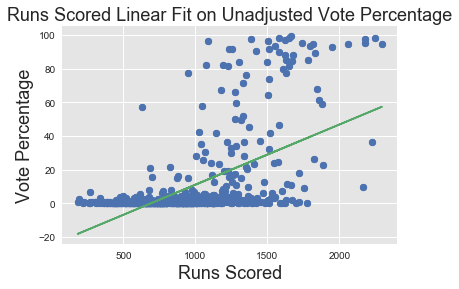

In [40]:
#simple regression graph on one variable
#https://plot.ly/matplotlib/linear-fits/

#set var to plot to xi
xi = X.R

plt.scatter(xi, y_orig)
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y_orig)
line = slope*xi + intercept
plt.plot(xi,y_orig,'o', xi, line)
plt.title('Runs Scored Linear Fit on Unadjusted Vote Percentage', fontsize = 18)
plt.xlabel('Runs Scored', fontsize = 18)
plt.ylabel('Vote Percentage', fontsize = 18)
ax = plt.gca()
ax.set_axis_bgcolor((0.898, 0.898, 0.898))
fig = plt.gcf()


In [23]:
print("r-squared:", r_value**2)

r-squared: 0.325306389605


/Users/whetfield/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  from ipykernel import kernelapp as app


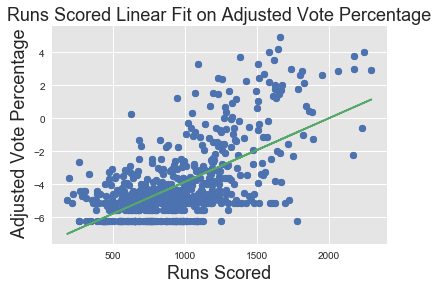

In [41]:
#simple regression graph on one variable
#https://plot.ly/matplotlib/linear-fits/

#set var to plot to xi
xi = X.R

plt.scatter(xi, y_transformed)
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y_transformed)
line = slope*xi + intercept
plt.plot(xi,y_transformed,'o', xi, line)
plt.title('Runs Scored Linear Fit on Adjusted Vote Percentage', fontsize = 18)
plt.xlabel('Runs Scored', fontsize = 18)
plt.ylabel(' Adjusted Vote Percentage', fontsize = 18)
ax = plt.gca()
ax.set_axis_bgcolor((0.898, 0.898, 0.898))
fig = plt.gcf()

In [25]:
print("r-squared:", r_value**2)

r-squared: 0.39097171182


Now lets run the basic linear regression in four ways.  Reduced data set of BA, HR, and SB on both the original %vote and the %vote transformed.  And lets also do this with the full traditional stat set

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

def stats_models_OLS_results(features, target):
    model = sm.OLS(target,sm.add_constant(features))
    results = model.fit()
    print(results.summary())
    
    y_pred = results.predict(sm.add_constant(features))

    plt.scatter(y_pred,target-y_pred,alpha=.1)
    plt.plot()
    plt.xlabel('Predicted Value')
    plt.ylabel('Residual')

Can see one hallmark of multi-collinearity as there is a large negative statistically significant coefficient on slugging percentage, which makes no sense that a higher slugger would lower the vote received.  We can see there is a clear trend in the residuals as well.  My interpretation of this is that due to the data skewness, the members of the hall of fame receiving vote pull the best fit line upwards from the large portion of the data set receiving few votes.  Can see the predictions from 0 - 40 largely have negative residuals of the same amount, meaning should be close to zero votes.  Lets see the results on the transformed vote % 

                            OLS Regression Results                            
Dep. Variable:                  %vote   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     56.24
Date:                Sat, 03 Feb 2018   Prob (F-statistic):           1.15e-75
Time:                        14:42:27   Log-Likelihood:                -2829.1
No. Observations:                 665   AIC:                             5678.
Df Residuals:                     655   BIC:                             5723.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -73.8081     11.123     -6.636      0.0

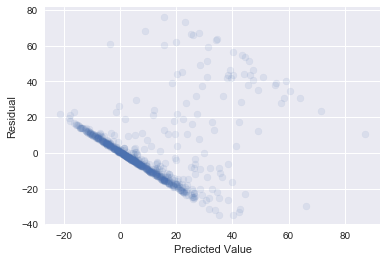

In [43]:
stats_models_OLS_results(hof_df.loc[:,['R' , 'H' , 'HR' , 'RBI', 'SB', 'BA', 'OBP','SLG','Steroids']],hof_df['%vote'])


                               OLS Regression Results                              
Dep. Variable:     %vote_shift_transformed   R-squared:                       0.497
Model:                                 OLS   Adj. R-squared:                  0.490
Method:                      Least Squares   F-statistic:                     71.86
Date:                     Sat, 03 Feb 2018   Prob (F-statistic):           1.00e-91
Time:                             14:42:34   Log-Likelihood:                -1247.7
No. Observations:                      665   AIC:                             2515.
Df Residuals:                          655   BIC:                             2560.
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

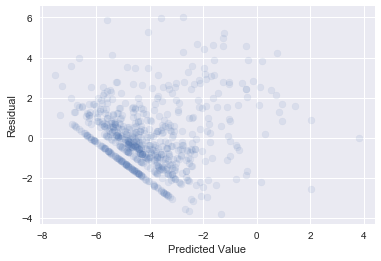

In [44]:
stats_models_OLS_results(hof_df.loc[:,['R' , 'H' , 'HR' , 'RBI', 'SB', 'BA', 'OBP','SLG','Steroids']],
                        hof_df['%vote_shift_transformed'])


                            OLS Regression Results                            
Dep. Variable:                  %vote   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     115.1
Date:                Sat, 03 Feb 2018   Prob (F-statistic):           5.55e-60
Time:                        14:42:36   Log-Likelihood:                -2879.7
No. Observations:                 665   AIC:                             5767.
Df Residuals:                     661   BIC:                             5785.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -61.4634      8.968     -6.853      0.0

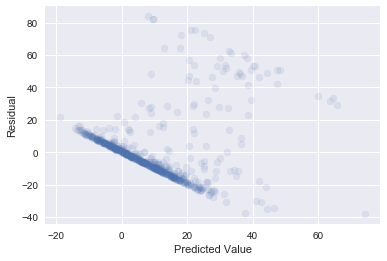

In [45]:
stats_models_OLS_results(hof_df.loc[:,['HR' , 'SB', 'BA']],hof_df['%vote'])

                               OLS Regression Results                              
Dep. Variable:     %vote_shift_transformed   R-squared:                       0.381
Model:                                 OLS   Adj. R-squared:                  0.378
Method:                      Least Squares   F-statistic:                     135.5
Date:                     Sat, 03 Feb 2018   Prob (F-statistic):           1.94e-68
Time:                             14:42:37   Log-Likelihood:                -1316.7
No. Observations:                      665   AIC:                             2641.
Df Residuals:                          661   BIC:                             2659.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

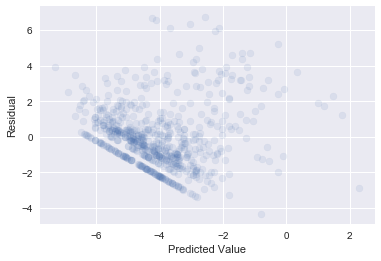

In [46]:
stats_models_OLS_results(hof_df.loc[:,['HR' , 'SB', 'BA']],hof_df['%vote_shift_transformed'])

Lets use cross-validation on a few different models to see if any R^Squared really standout in different model forms.  I'm going to use the full data set on the the adjusted vote percentage

In [50]:
#Random State is 7 for Mickey Mantle
kf = KFold(n_splits=10, shuffle=True, random_state = 7)
cv_lm_r2s, cv_lm_reg_r2s, cv_poly2_r2s, cv_poly3_r2s = [], [], [], []#collect the validation results for both models

y_adjusted = np.array(hof_df['%vote_shift_transformed'])
X = np.array(hof_df.loc[:,['R' , 'H' , 'HR' , 'RBI', 'SB', 'BA', 'OBP','SLG','Steroids']])

for train_ind, val_ind in kf.split(X,y_adjusted):
    
    X_train, y_train = X[train_ind], y_adjusted[train_ind]
    X_val, y_val = X[val_ind], y_adjusted[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling, need to rescale on each shuffle so inside the loop!
    lm_reg = Ridge(alpha=1)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    
    #Poly squared features
    poly2 = PolynomialFeatures(degree=2) 
    lm_poly2 = LinearRegression()
    X_train_poly2 = poly2.fit_transform(X_train)
    X_val_poly2 = poly2.transform(X_val)
    lm_poly2.fit(X_train_poly2, y_train)
    cv_poly2_r2s.append(lm_poly2.score(X_val_poly2, y_val))
    
    #Poly cubed features
    poly3 = PolynomialFeatures(degree=3) 
    lm_poly3 = LinearRegression()
    X_train_poly3 = poly3.fit_transform(X_train)
    X_val_poly3 = poly3.transform(X_val)
    lm_poly3.fit(X_train_poly3, y_train)
    cv_poly3_r2s.append(lm_poly3.score(X_val_poly3, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')
print('Poly2 scores: ', cv_poly2_r2s, '\n' )
print('Poly3 scores: ', cv_poly3_r2s, '\n' )

print('Simple mean cv r^2: %.3f +- %.3f' %(np.mean(cv_lm_r2s),np.std(cv_lm_r2s)))
print('Ridge mean cv r^2: %.3f +- %.3f' %(np.mean(cv_lm_reg_r2s),np.std(cv_lm_reg_r2s)))
print('Poly2 mean cv r^2: %.3f +- %.3f' %(np.mean(cv_poly2_r2s),np.std(cv_poly2_r2s)))
print('Poly3 mean cv r^2: %.3f +- %.3f' %(np.mean(cv_poly3_r2s),np.std(cv_poly3_r2s)))

Simple regression scores:  [0.59355153597351151, 0.52738455539431861, 0.39115106256252929, 0.31680170936078234, 0.58834514136122729, 0.50117726969779541, 0.28430717370833847, 0.40564457359591799, 0.54711367277431289, 0.25026236632978549]
Ridge scores:  [0.5926771504871321, 0.5296156339470387, 0.39042342505393285, 0.31811289248363694, 0.58663493245612019, 0.50165274061328136, 0.28275932856036923, 0.40540532867777146, 0.54958587509165224, 0.25435134800347881] 

Poly2 scores:  [0.75569718870238645, 0.63064456853736695, 0.56274976752980477, -0.10395670525713552, -4.7306727486515268, 0.61723906234528525, -0.35738599265584331, 0.51223319943685564, 0.42327433413235749, 0.28985956353190701] 

Poly3 scores:  [-0.28513992977635083, -3634730.6712668194, -50455967.568011463, -0.047463261205429985, 0.41121365854365077, 0.24291375850636157, -349428.2647246886, 0.093715860257472361, -871.98699463288233, -1.9922441836965827] 

Simple mean cv r^2: 0.441 +- 0.121
Ridge mean cv r^2: 0.441 +- 0.121
Poly2 

Linear regression looks best and that there is overfitting in the polynomial case.  Curious to try these three on the reduced feature set,  poly2 had some decent fits and some really bad ones. But poly2 had some very good fits and some very bad ones. Maybe giving it fewer features will reduce some overfitting.  Also lets kick out the poly3 but try poly2 with interaction only on True

In [51]:
#Random state 4 for Lou Gehrig
kf = KFold(n_splits=10, shuffle=True, random_state = 4)
cv_lm_r2s, cv_lm_reg_r2s, cv_poly2_r2s, cv_poly_inter_only_r2s = [], [], [], []#collect the validation results for both models

y_adjusted = np.array(hof_df['%vote_shift_transformed'])
X = np.array(hof_df.loc[:,['HR' , 'BA', 'SB','Steroids']])

for train_ind, val_ind in kf.split(X,y_adjusted):
    
    X_train, y_train = X[train_ind], y_adjusted[train_ind]
    X_val, y_val = X[val_ind], y_adjusted[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling, need to rescale on each shuffle so inside the loop!
    lm_reg = Ridge(alpha=3)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    
    #Poly squared features
    poly2 = PolynomialFeatures(degree=2) 
    lm_poly2 = LinearRegression()
    X_train_poly2 = poly2.fit_transform(X_train)
    X_val_poly2 = poly2.transform(X_val)
    lm_poly2.fit(X_train_poly2, y_train)
    cv_poly2_r2s.append(lm_poly2.score(X_val_poly2, y_val))
    
    #Poly cubed features
    poly_inter_only = PolynomialFeatures(degree=2, interaction_only = True) 
    lm_poly_inter_only = LinearRegression()
    X_train_poly_inter_only = poly_inter_only.fit_transform(X_train)
    X_val_poly_inter_only = poly_inter_only.transform(X_val)
    lm_poly_inter_only.fit(X_train_poly_inter_only, y_train)
    cv_poly_inter_only_r2s.append(lm_poly_inter_only.score(X_val_poly_inter_only, y_val))

print('Simple regression scores: ', cv_lm_r2s, '\n')
print('Ridge scores: ', cv_lm_reg_r2s, '\n')
print('Poly2 scores: ', cv_poly2_r2s, '\n' )
print('Poly2 only interaction  scores: ', cv_poly3_r2s, '\n' )

print('Simple mean cv r^2: %.3f +- %.3f' %(np.mean(cv_lm_r2s),np.std(cv_lm_r2s)))
print('Ridge mean cv r^2: %.3f +- %.3f' %(np.mean(cv_lm_reg_r2s),np.std(cv_lm_reg_r2s)))
print('Poly2 mean cv r^2: %.3f +- %.3f' %(np.mean(cv_poly2_r2s),np.std(cv_poly2_r2s)))
print('Poly2 only interaction mean cv r^2: %.3f +- %.3f' %(np.mean(cv_poly_inter_only_r2s),np.std(cv_poly_inter_only_r2s)))

Simple regression scores:  [0.31029745944803211, 0.33708434074824511, 0.26887998061259866, 0.42318503480519271, 0.50803657755668352, 0.36268309352513861, 0.31613874169706557, 0.24911142204637182, 0.4563810578098641, 0.32732591420063906] 

Ridge scores:  [0.31142791018998406, 0.33716098540478945, 0.26989249094000012, 0.42274230563375503, 0.5078250449176791, 0.36224954965405476, 0.31602575482000528, 0.25113645753338032, 0.45555717939059265, 0.32715767388933814] 

Poly2 scores:  [0.39375820577213583, 0.4923728913400171, 0.36443182036711058, 0.48142862568657724, 0.62844969999700973, 0.33533073223877385, 0.35232519567296977, 0.39925462553103458, 0.56513856781893379, 0.44449130210949794] 

Poly2 only interaction  scores:  [-0.28513992977635083, -3634730.6712668194, -50455967.568011463, -0.047463261205429985, 0.41121365854365077, 0.24291375850636157, -349428.2647246886, 0.093715860257472361, -871.98699463288233, -1.9922441836965827] 

Simple mean cv r^2: 0.356 +- 0.079
Ridge mean cv r^2: 0.35

**Tuning Parameters and Hold Out Set**

Lets add regularization to the Poly2 model and tune the linear model similarly.  See if there are possible improvements to R2.  Further, lets create a hold out set to get true no look forward performance.  So workflow will be as follows:

Cross - Validation with k-folds on 80% to get the best regularization value on alpha for both Linear and Poly2.
Reshuffle the 80%, then perform k-folds and see which model has the best the performance on its chosen alpha value

Select that model, and retrain on the full 80%

Next test on the held out 20% to see performance

In [52]:
#y_adjusted_passed into y_train
y_adjusted = np.array(hof_df['%vote_shift_transformed'])
X = np.array(hof_df.loc[:,['HR' , 'BA', 'SB','Steroids']])
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y_adjusted, test_size=0.2, random_state=42)

In [53]:
#Build kfolds object
kfold = KFold(n_splits=10, shuffle=True, random_state=99)

In [54]:
#pair programming solution code
def build_grid_search_est(model, X, y, cv=5, **params):
    
    grid_est = GridSearchCV(model, param_grid=params, cv=cv)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.grid_scores_)
    for param in params:
        df[param] = df.parameters.apply(lambda val: val[param])
#         plt.plot(np.log(df.alpha), df.mean_validation_score);
        plt.semilogx(df.alpha, df.mean_validation_score)
    grid_est.grid_scores_
    return grid_est

/Users/whetfield/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/whetfield/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


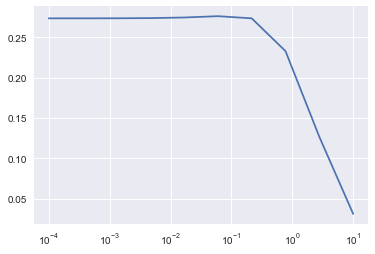

In [55]:
ridge_grid_est = build_grid_search_est(Ridge(fit_intercept = True, normalize = True), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, 1, 10))

In [56]:
ridge_grid_est.best_estimator_

Ridge(alpha=0.059948425031894091, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [57]:
ridge_grid_est.grid_scores_

/Users/whetfield/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.27356, std: 0.15365, params: {'alpha': 0.0001},
 mean: 0.27357, std: 0.15360, params: {'alpha': 0.00035938136638046257},
 mean: 0.27364, std: 0.15343, params: {'alpha': 0.001291549665014884},
 mean: 0.27387, std: 0.15280, params: {'alpha': 0.0046415888336127824},
 mean: 0.27461, std: 0.15058, params: {'alpha': 0.016681005372000592},
 mean: 0.27625, std: 0.14316, params: {'alpha': 0.059948425031894091},
 mean: 0.27358, std: 0.12199, params: {'alpha': 0.21544346900318845},
 mean: 0.23293, std: 0.08176, params: {'alpha': 0.77426368268112777},
 mean: 0.12673, std: 0.04198, params: {'alpha': 2.7825594022071258},
 mean: 0.03133, std: 0.02399, params: {'alpha': 10.0}]

/Users/whetfield/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/whetfield/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


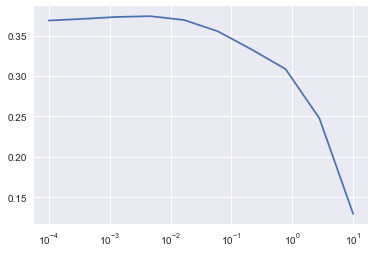

In [58]:
poly2 = PolynomialFeatures(degree=2) 
X_train_poly2 = poly2.fit_transform(X_train)
ridge_poly_grid_est = build_grid_search_est(Ridge(fit_intercept = True, normalize = True), X_train_poly2, y_train, cv=kfold,
                                       alpha=np.logspace(-4, 1, 10))

In [59]:
ridge_poly_grid_est.best_estimator_

Ridge(alpha=0.0046415888336127824, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [60]:
ridge_poly_grid_est.grid_scores_

/Users/whetfield/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.36856, std: 0.10415, params: {'alpha': 0.0001},
 mean: 0.37056, std: 0.10319, params: {'alpha': 0.00035938136638046257},
 mean: 0.37298, std: 0.10293, params: {'alpha': 0.001291549665014884},
 mean: 0.37393, std: 0.10256, params: {'alpha': 0.0046415888336127824},
 mean: 0.36922, std: 0.10903, params: {'alpha': 0.016681005372000592},
 mean: 0.35518, std: 0.12934, params: {'alpha': 0.059948425031894091},
 mean: 0.33271, std: 0.14202, params: {'alpha': 0.21544346900318845},
 mean: 0.30859, std: 0.12885, params: {'alpha': 0.77426368268112777},
 mean: 0.24784, std: 0.08654, params: {'alpha': 2.7825594022071258},
 mean: 0.12960, std: 0.04438, params: {'alpha': 10.0}]

Lets use .005 for alpha in ridge with polynomial and .06 in the regular ridge.  Lets reshuffle the 80% and test on k-folds

In [61]:
#Random state 23 for Don Mattingly
kf = KFold(n_splits=10, shuffle=True, random_state = 23)
cv_lm_reg_r2s, cv_poly2_reg_r2s = [],[]#collect the validation results for both models

X_train = np.array(X_train)
y_train = np.array(y_train)

for train_ind, val_ind in kf.split(X_train,y_train):
    
    X_train_k, y_train_k = X_train[train_ind], y_train[train_ind]
    X_val_k, y_val_k = X_train[val_ind], y_train[val_ind] 
    

    
    #ridge with feature scaling, need to rescale on each shuffle so inside the loop!
    lm_reg = Ridge(alpha=0.005, fit_intercept = True)
    scaler = StandardScaler()
    X_train_scaled_k = scaler.fit_transform(X_train_k)
    X_val_scaled_k = scaler.transform(X_val_k)
    lm_reg.fit(X_train_scaled_k, y_train_k)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled_k, y_val_k))
    
    
    #Ridge with polynomial features and scaling
    poly2 = PolynomialFeatures(degree=2) 
    lm_poly2 = Ridge(alpha = 0.017, fit_intercept = True)
    X_train_poly2 = poly2.fit_transform(X_train_k)
    X_val_poly2 = poly2.transform(X_val_k)
    scaler = StandardScaler()
    X_train_poly2_k = scaler.fit_transform(X_train_poly2)
    X_val_poly2_k = scaler.transform(X_val_poly2)
    lm_poly2.fit(X_train_poly2_k, y_train_k)
    cv_poly2_reg_r2s.append(lm_poly2.score(X_val_poly2_k, y_val_k))
    

print('Linear Ridge scores: ', cv_lm_reg_r2s)
print('Poly2 Ridge scores: ', cv_poly2_reg_r2s, '\n' )

print('Linear Ridge mean cv r^2: %.3f +- %.3f' %(np.mean(cv_lm_reg_r2s),np.std(cv_lm_reg_r2s)))
print('Poly2 Ridge mean cv r^2: %.3f +- %.3f' %(np.mean(cv_poly2_reg_r2s),np.std(cv_poly2_reg_r2s)))

Linear Ridge scores:  [0.20168452136837089, 0.2488841552515256, 0.47384009318630238, 0.38976102707448657, 0.34910446312765298, 0.28395764144061597, -0.05742350316541156, 0.4040672803566665, 0.37963386528372606, 0.35711663631956719]
Poly2 Ridge scores:  [0.22998718421633291, 0.33658054232452794, 0.36101266596940196, 0.46259646939845822, 0.41591165437597144, 0.36224983245620179, 0.095225431708301889, 0.50217804973559632, 0.53085392670426512, 0.55160096967764916] 

Linear Ridge mean cv r^2: 0.303 +- 0.142
Poly2 Ridge mean cv r^2: 0.385 +- 0.135


Lets go ahead and retrain the polynomial on the full X_train and see how it performs on the hold out set

In [62]:
final_classifier = Ridge(alpha=0.005, fit_intercept = True)

poly2 = PolynomialFeatures(degree=2) 
X_train_poly2 = poly2.fit_transform(X_train)
X_holdout_poly2 = poly2.transform(X_holdout)

scaler = StandardScaler()
X_train_poly2 = scaler.fit_transform(X_train_poly2)
X_holdout_poly2 = scaler.transform(X_holdout_poly2)

final_classifier.fit(X_train_poly2, y_train)

Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [63]:
y_pred = final_classifier.predict(X_holdout_poly2)
print("Final Classifier:", r2_score(y_holdout, y_pred))


Final Classifier: 0.518245030719


Would like to get root mean squared error in interprebale form in terms of percentage points, not the transformed version I've predicted

In [64]:
def sigmoid (x):
    return (100.2 / (np.exp(-x) + 1))

def rmse_in_percent_terms(pred, test):
    """"
    Take the  transformed y values of prediction and test
    and return a RMSE in terms of percentage of vote

    """
    vfunc = np.vectorize(sigmoid)
    pred_percentage = vfunc(pred)
    test_percentage = vfunc(test)
    return np.sqrt(np.mean((pred_percentage - test_percentage)**2))
                   

rmse_in_percent_terms(y_pred,y_holdout)

18.967422157565178

In [65]:
vfunc = np.vectorize(sigmoid)
y_pred= vfunc(y_pred)   
y_holdout = vfunc(y_holdout)

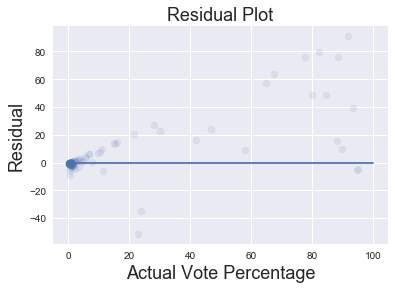

In [67]:
plt.scatter(y_holdout,y_holdout-y_pred,alpha=.1)
plt.title('Residual Plot', fontsize = 18)
plt.xlabel('Actual Vote Percentage', fontsize = 18)
plt.ylabel('Residual', fontsize = 18)
plt.plot(np.linspace(0,100,1000),np.linspace(0,0,1000))


Off by about 19% points on average
"It's not what you want" - Joe Girardi, former Manager of the New York Yankees

# Reduced Dataset, only look at if got more than 5% of the vote

What if we unskew the dataset a bit by getting rid of some of the low vote percentages, say if you got under 5% of the vote, we aren't too concerned about you. 

In [95]:
hof_df.columns

Index(['Rk', 'YoB', 'Votes', '%vote', 'HOFm', 'HOFs', 'Yrs', 'WAR', 'WAR7',
       'JAWS', 'Jpos', 'G', 'AB', 'R', 'H', 'HR', 'RBI', 'SB', 'BB', 'BA',
       'OBP', 'SLG', 'OPS', 'OPS+', 'P_W', 'P_L', 'P_ERA', 'P_ERA+', 'P_WHIP',
       'P_G', 'P_GS', 'P_SV', 'P_IP', 'P_H', 'P_HR', 'P_BB', 'P_SO',
       'Pos Summary', 'Year_of_Vote', 'Steroids', '%vote_shift',
       '%vote_shift_transformed'],
      dtype='object')

In [98]:
hof_df5 = hof_df[hof_df['%vote']>=5]

(array([ 38.,  20.,  10.,   9.,   5.,   5.,   4.,   6.,  13.,  21.]),
 array([  5.  ,  14.43,  23.86,  33.29,  42.72,  52.15,  61.58,  71.01,
         80.44,  89.87,  99.3 ]),
 <a list of 10 Patch objects>)

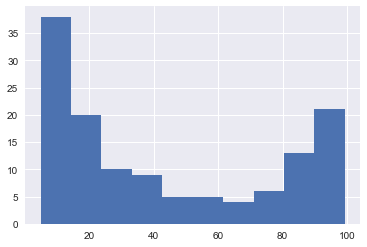

In [118]:
plt.hist(hof_df5['%vote'])

In [100]:
X = hof_df5.loc[:,['R' , 'H' , 'HR' , 'RBI', 'SB', 'BA', 'OBP','SLG', 'WAR','WAR7','Steroids']]
y_orig = hof_df5['%vote']
y_shift = hof_df5['%vote_shift']
y_transformed = hof_df5['%vote_shift_transformed']

(array([ 32.,  19.,  22.,   9.,  10.,  14.,   8.,  10.,   5.,   2.]),
 array([-2.90521827, -2.11901318, -1.3328081 , -0.54660301,  0.23960208,
         1.02580716,  1.81201225,  2.59821733,  3.38442242,  4.1706275 ,
         4.95683259]),
 <a list of 10 Patch objects>)

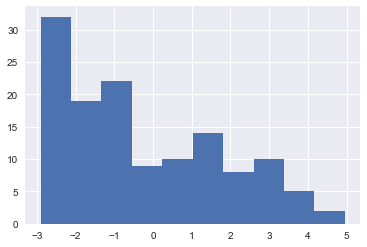

In [115]:
plt.hist(hof_df5['%vote_shift_transformed'])

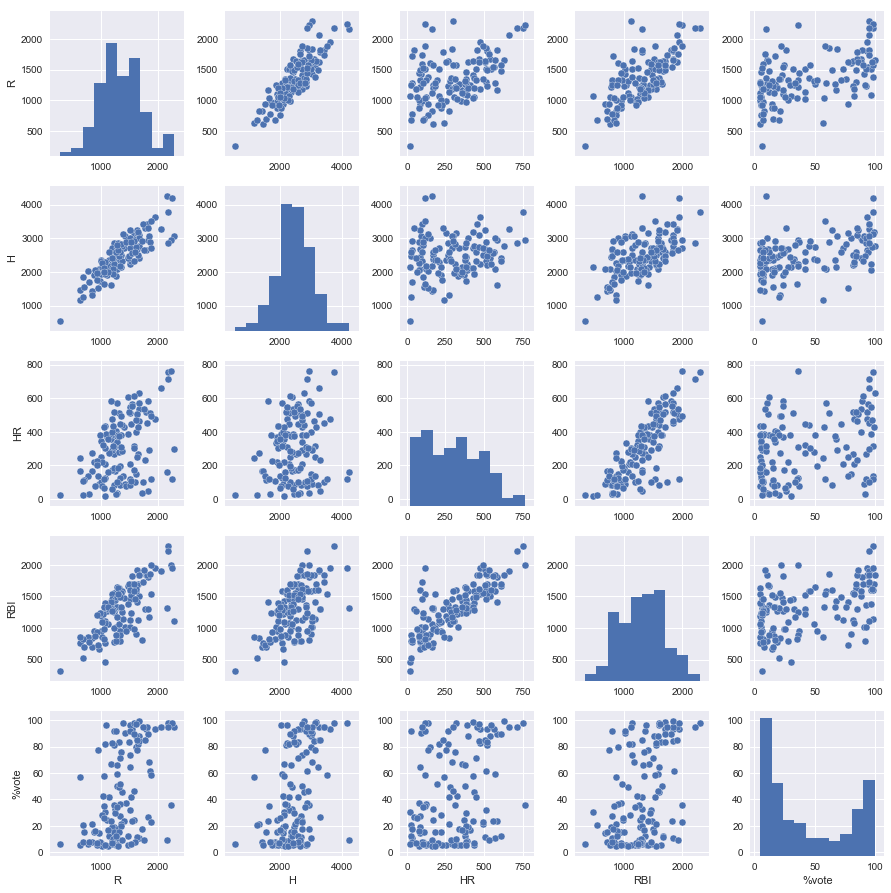

In [101]:
sns.pairplot(hof_df5.loc[:,['R', 'H', 'HR', 'RBI', '%vote']])

/Users/whetfield/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  del sys.path[0]


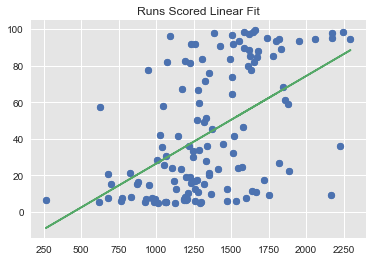

In [102]:
#simple regression graph on one variable
#https://plot.ly/matplotlib/linear-fits/

#set var to plot to xi
xi = X.R

plt.scatter(xi, y_orig)
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y_orig)
line = slope*xi + intercept
plt.plot(xi,y_orig,'o', xi, line)
plt.title('Runs Scored Linear Fit')
ax = plt.gca()
ax.set_axis_bgcolor((0.898, 0.898, 0.898))
fig = plt.gcf()


In [103]:
print("r-squared:", r_value**2)

r-squared: 0.265774921564


/Users/whetfield/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  del sys.path[0]


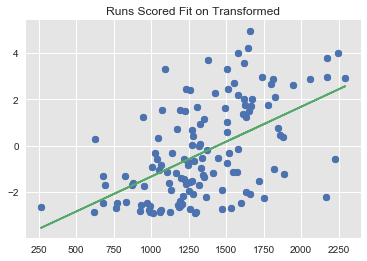

In [104]:
#simple regression graph on one variable
#https://plot.ly/matplotlib/linear-fits/

#set var to plot to xi
xi = X.R

plt.scatter(xi, y_transformed)
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y_transformed)
line = slope*xi + intercept
plt.plot(xi,y_transformed,'o', xi, line)
plt.title('Runs Scored Fit on Transformed')
ax = plt.gca()
ax.set_axis_bgcolor((0.898, 0.898, 0.898))
fig = plt.gcf()

In [105]:
print("r-squared:", r_value**2)

r-squared: 0.285777692523


                            OLS Regression Results                            
Dep. Variable:                  %vote   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     8.733
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           4.97e-10
Time:                        15:16:58   Log-Likelihood:                -615.84
No. Observations:                 131   AIC:                             1252.
Df Residuals:                     121   BIC:                             1280.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -118.3150     41.790     -2.831      0.0

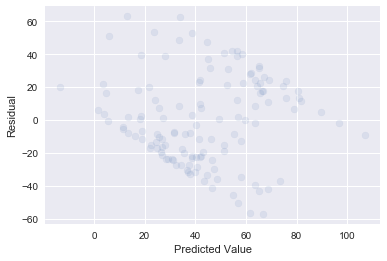

In [107]:
stats_models_OLS_results(hof_df5.loc[:,['R' , 'H' , 'HR' , 'RBI', 'SB', 'BA', 'OBP','SLG','Steroids']],hof_df5['%vote'])


                               OLS Regression Results                              
Dep. Variable:     %vote_shift_transformed   R-squared:                       0.409
Model:                                 OLS   Adj. R-squared:                  0.365
Method:                      Least Squares   F-statistic:                     9.318
Date:                     Thu, 01 Feb 2018   Prob (F-statistic):           1.17e-10
Time:                             15:17:36   Log-Likelihood:                -247.02
No. Observations:                      131   AIC:                             514.0
Df Residuals:                          121   BIC:                             542.8
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

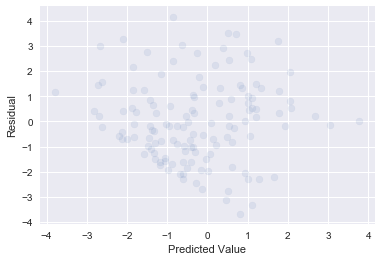

In [108]:
stats_models_OLS_results(hof_df5.loc[:,['R' , 'H' , 'HR' , 'RBI', 'SB', 'BA', 'OBP','SLG','Steroids']],
                        hof_df5['%vote_shift_transformed'])


                            OLS Regression Results                            
Dep. Variable:                  %vote   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     13.51
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           1.04e-07
Time:                        15:18:34   Log-Likelihood:                -630.48
No. Observations:                 131   AIC:                             1269.
Df Residuals:                     127   BIC:                             1280.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -51.8569     33.191     -1.562      0.1

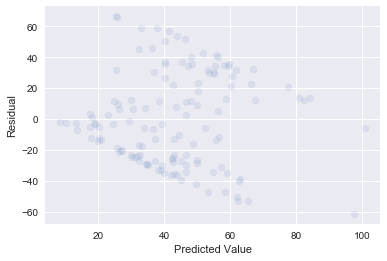

In [109]:
stats_models_OLS_results(hof_df5.loc[:,['HR' , 'SB', 'BA']],hof_df5['%vote'])

                               OLS Regression Results                              
Dep. Variable:     %vote_shift_transformed   R-squared:                       0.258
Model:                                 OLS   Adj. R-squared:                  0.241
Method:                      Least Squares   F-statistic:                     14.73
Date:                     Thu, 01 Feb 2018   Prob (F-statistic):           2.74e-08
Time:                             15:19:02   Log-Likelihood:                -261.96
No. Observations:                      131   AIC:                             531.9
Df Residuals:                          127   BIC:                             543.4
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

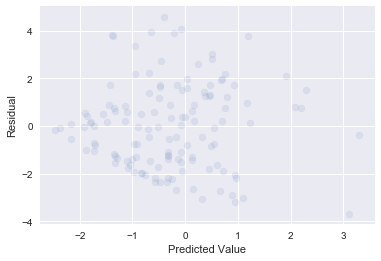

In [110]:
stats_models_OLS_results(hof_df5.loc[:,['HR' , 'SB', 'BA']],hof_df5['%vote_shift_transformed'])

In [112]:
#Random State is 44 for Reggie Jackson
kf = KFold(n_splits=10, shuffle=True, random_state = 44)
cv_lm_r2s, cv_lm_reg_r2s, cv_poly2_r2s, cv_poly3_r2s = [], [], [], []#collect the validation results for both models

y_adjusted = np.array(hof_df5['%vote_shift_transformed'])
X = np.array(hof_df5.loc[:,['R' , 'H' , 'HR' , 'RBI', 'SB', 'BA', 'OBP','SLG','Steroids']])

for train_ind, val_ind in kf.split(X,y_adjusted):
    
    X_train, y_train = X[train_ind], y_adjusted[train_ind]
    X_val, y_val = X[val_ind], y_adjusted[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling, need to rescale on each shuffle so inside the loop!
    lm_reg = Ridge(alpha=1)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    
    #Poly squared features
    poly2 = PolynomialFeatures(degree=2) 
    lm_poly2 = LinearRegression()
    X_train_poly2 = poly2.fit_transform(X_train)
    X_val_poly2 = poly2.transform(X_val)
    lm_poly2.fit(X_train_poly2, y_train)
    cv_poly2_r2s.append(lm_poly2.score(X_val_poly2, y_val))
    
    #Poly cubed features
    poly3 = PolynomialFeatures(degree=3) 
    lm_poly3 = LinearRegression()
    X_train_poly3 = poly3.fit_transform(X_train)
    X_val_poly3 = poly3.transform(X_val)
    lm_poly3.fit(X_train_poly3, y_train)
    cv_poly3_r2s.append(lm_poly3.score(X_val_poly3, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s)
print('Poly2 scores: ', cv_poly2_r2s )
print('Poly3 scores: ', cv_poly3_r2s, '\n' )

print('Simple mean cv r^2: %.3f +- %.3f' %(np.mean(cv_lm_r2s),np.std(cv_lm_r2s)))
print('Ridge mean cv r^2: %.3f +- %.3f' %(np.mean(cv_lm_reg_r2s),np.std(cv_lm_reg_r2s)))
print('Poly2 mean cv r^2: %.3f +- %.3f' %(np.mean(cv_poly2_r2s),np.std(cv_poly2_r2s)))
print('Poly3 mean cv r^2: %.3f +- %.3f' %(np.mean(cv_poly3_r2s),np.std(cv_poly3_r2s)))

Simple regression scores:  [-0.79312302892423436, 0.31935854899366756, -0.14768104558799044, 0.49330943996242421, 0.39287517120706872, 0.49564063626554244, -0.095030587004178754, 0.40021351826747387, 0.4650354766863849, 0.39205632306553506]
Ridge scores:  [-0.73495836944893678, 0.28982300708333686, -0.10444433319377477, 0.51597248317783162, 0.39061940414023805, 0.46057638118278305, -0.061183079990970946, 0.37977918907442787, 0.46677000086062204, 0.37930188225083972]
Poly2 scores:  [-1.254117556309942, -0.89530638949188912, -50.854349512912741, -0.15646132664099044, -25.802803154910293, 0.63726183817755722, -5.141517515737787, -0.54111010966511786, 0.046223181070587316, 0.21506231631520378]
Poly3 scores:  [-1718.1058692442434, -677.41590199677785, -1228.8645071685935, -497.44516664696022, -92246.148692485556, -3757.5629005868946, -119.50711681213173, -2758.4123084547405, -247.7879201316253, -85.365558873393169] 

Simple mean cv r^2: 0.192 +- 0.396
Ridge mean cv r^2: 0.198 +- 0.372
Poly2

In [114]:
#Random state 5 for Joe DiMaggio
kf = KFold(n_splits=10, shuffle=True, random_state = 5)
cv_lm_r2s, cv_lm_reg_r2s, cv_poly2_r2s, cv_poly_inter_only_r2s = [], [], [], []#collect the validation results for both models

y_adjusted = np.array(hof_df5['%vote_shift_transformed'])
X = np.array(hof_df5.loc[:,['HR' , 'BA', 'SB','Steroids']])

for train_ind, val_ind in kf.split(X,y_adjusted):
    
    X_train, y_train = X[train_ind], y_adjusted[train_ind]
    X_val, y_val = X[val_ind], y_adjusted[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling, need to rescale on each shuffle so inside the loop!
    lm_reg = Ridge(alpha=3)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    
    #Poly squared features
    poly2 = PolynomialFeatures(degree=2) 
    lm_poly2 = LinearRegression()
    X_train_poly2 = poly2.fit_transform(X_train)
    X_val_poly2 = poly2.transform(X_val)
    lm_poly2.fit(X_train_poly2, y_train)
    cv_poly2_r2s.append(lm_poly2.score(X_val_poly2, y_val))
    
    #Poly cubed features
    poly_inter_only = PolynomialFeatures(degree=2, interaction_only = True) 
    lm_poly_inter_only = LinearRegression()
    X_train_poly_inter_only = poly_inter_only.fit_transform(X_train)
    X_val_poly_inter_only = poly_inter_only.transform(X_val)
    lm_poly_inter_only.fit(X_train_poly_inter_only, y_train)
    cv_poly_inter_only_r2s.append(lm_poly_inter_only.score(X_val_poly_inter_only, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s)
print('Poly2 scores: ', cv_poly2_r2s )
print('Poly2 only interaction  scores: ', cv_poly3_r2s, '\n' )

print('Simple mean cv r^2: %.3f +- %.3f' %(np.mean(cv_lm_r2s),np.std(cv_lm_r2s)))
print('Ridge mean cv r^2: %.3f +- %.3f' %(np.mean(cv_lm_reg_r2s),np.std(cv_lm_reg_r2s)))
print('Poly2 mean cv r^2: %.3f +- %.3f' %(np.mean(cv_poly2_r2s),np.std(cv_poly2_r2s)))
print('Poly2 only interaction mean cv r^2: %.3f +- %.3f' %(np.mean(cv_poly_inter_only_r2s),np.std(cv_poly_inter_only_r2s)))

Simple regression scores:  [0.20198388803862929, 0.14981846642758445, 0.36277652145038752, 0.08732632268327245, -0.081389912290512401, -0.041334553020201614, 0.2728539986808578, 0.42031919356826741, 0.16008317786863568, 0.1909043626948238]
Ridge scores:  [0.19331769684356359, 0.14801726277494409, 0.35615043772005051, 0.079440584658296412, -0.05429843339067042, -0.029270037174934149, 0.26719208741999589, 0.41704951992686812, 0.15960217473975802, 0.20799184036492713]
Poly2 scores:  [0.15751164919212002, 0.15155553445482062, 0.39202852183989301, 0.14160265038441266, 0.36760062327169374, -0.016990734318012235, 0.25947414071459329, 0.33439015160475494, 0.28805675989665047, -0.12712879992681381]
Poly2 only interaction  scores:  [-1718.1058692442434, -677.41590199677785, -1228.8645071685935, -497.44516664696022, -92246.148692485556, -3757.5629005868946, -119.50711681213173, -2758.4123084547405, -247.7879201316253, -85.365558873393169] 

Simple mean cv r^2: 0.172 +- 0.151
Ridge mean cv r^2: 0.

In [119]:
#y_adjusted_passed into y_train
y_adjusted = np.array(hof_df5['%vote_shift_transformed'])
X = np.array(hof_df5.loc[:,['HR' , 'BA', 'SB','Steroids']])
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y_adjusted, test_size=0.2, random_state=42)

In [80]:
#Random state 77 for Red Thunder Clint Frazier
kfold = KFold(n_splits=10, shuffle=True, random_state=77)

/Users/whetfield/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/whetfield/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


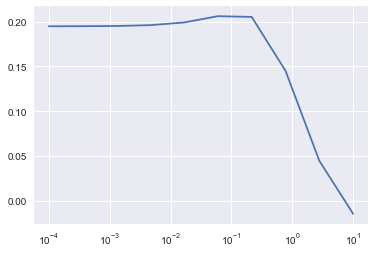

In [120]:
ridge_grid_est = build_grid_search_est(Ridge(fit_intercept = True, normalize = True), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, 1, 10))

In [121]:
ridge_grid_est.best_estimator_

Ridge(alpha=0.059948425031894091, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [122]:
ridge_grid_est.grid_scores_

/Users/whetfield/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.19470, std: 0.22382, params: {'alpha': 0.0001},
 mean: 0.19477, std: 0.22370, params: {'alpha': 0.00035938136638046257},
 mean: 0.19504, std: 0.22327, params: {'alpha': 0.001291549665014884},
 mean: 0.19596, std: 0.22172, params: {'alpha': 0.0046415888336127824},
 mean: 0.19894, std: 0.21643, params: {'alpha': 0.016681005372000592},
 mean: 0.20598, std: 0.20008, params: {'alpha': 0.059948425031894091},
 mean: 0.20517, std: 0.16183, params: {'alpha': 0.21544346900318845},
 mean: 0.14501, std: 0.10452, params: {'alpha': 0.77426368268112777},
 mean: 0.04454, std: 0.05888, params: {'alpha': 2.7825594022071258},
 mean: -0.01465, std: 0.04898, params: {'alpha': 10.0}]

/Users/whetfield/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/whetfield/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


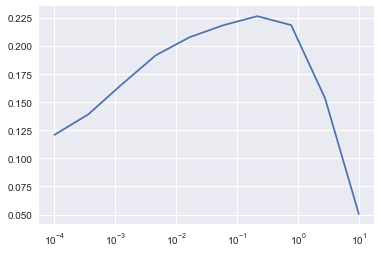

In [123]:
poly2 = PolynomialFeatures(degree=2) 
X_train_poly2 = poly2.fit_transform(X_train)
ridge_poly_grid_est = build_grid_search_est(Ridge(fit_intercept = True, normalize = True), X_train_poly2, y_train, cv=kfold,
                                       alpha=np.logspace(-4, 1, 10))

In [124]:
ridge_poly_grid_est.best_estimator_

Ridge(alpha=0.21544346900318845, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [125]:
#Random state 1 for Billy Martin
kf = KFold(n_splits=10, shuffle=True, random_state = 1)
cv_lm_reg_r2s, cv_poly2_reg_r2s = [],[]#collect the validation results for both models

X_train = np.array(X_train)
y_train = np.array(y_train)

for train_ind, val_ind in kf.split(X_train,y_train):
    
    X_train_k, y_train_k = X_train[train_ind], y_train[train_ind]
    X_val_k, y_val_k = X_train[val_ind], y_train[val_ind] 
    

    
    #ridge with feature scaling, need to rescale on each shuffle so inside the loop!
    lm_reg = Ridge(alpha=0.06, fit_intercept = True)
    scaler = StandardScaler()
    X_train_scaled_k = scaler.fit_transform(X_train_k)
    X_val_scaled_k = scaler.transform(X_val_k)
    lm_reg.fit(X_train_scaled_k, y_train_k)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled_k, y_val_k))
    
    
    #Ridge with polynomial features and scaling
    poly2 = PolynomialFeatures(degree=2) 
    lm_poly2 = Ridge(alpha = 0.215, fit_intercept = True)
    X_train_poly2 = poly2.fit_transform(X_train_k)
    X_val_poly2 = poly2.transform(X_val_k)
    scaler = StandardScaler()
    X_train_poly2_k = scaler.fit_transform(X_train_poly2)
    X_val_poly2_k = scaler.transform(X_val_poly2)
    lm_poly2.fit(X_train_poly2_k, y_train_k)
    cv_poly2_reg_r2s.append(lm_poly2.score(X_val_poly2_k, y_val_k))
    

print('Linear Ridge scores: ', cv_lm_reg_r2s)
print('Poly2 Ridge scores: ', cv_poly2_reg_r2s, '\n' )

print('Linear Ridge mean cv r^2: %.3f +- %.3f' %(np.mean(cv_lm_reg_r2s),np.std(cv_lm_reg_r2s)))
print('Poly2 Ridge mean cv r^2: %.3f +- %.3f' %(np.mean(cv_poly2_reg_r2s),np.std(cv_poly2_reg_r2s)))

Linear Ridge scores:  [0.33372400620467124, 0.21727901340524489, 0.56484023886852752, 0.13085777861840042, 0.19479116854500392, 0.28240457410717978, -1.99560040499001, -0.0066288910787453137, 0.27194066500777703, 0.062100237920841954]
Poly2 Ridge scores:  [0.24468472736409672, 0.24896760305221097, 0.1114961230867708, 0.070882625056722826, 0.36743312766174069, 0.25086782202776081, -2.9381556128062241, -0.22181733714619423, 0.27096956625020652, 0.13034060968870531] 

Linear Ridge mean cv r^2: 0.006 +- 0.684
Poly2 Ridge mean cv r^2: -0.146 +- 0.943


In [126]:
final_classifier = Ridge(alpha=0.06, fit_intercept = True)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_holdout = scaler.transform(X_holdout)

final_classifier.fit(X_train, y_train)

Ridge(alpha=0.06, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [127]:
y_pred = final_classifier.predict(X_holdout)
print("Final Classifier:", r2_score(y_holdout, y_pred))


Final Classifier: 0.202625456422


In [128]:
def sigmoid (x):
    return (100.2 / (np.exp(-x) + 1))

def rmse_in_percent_terms(pred, test):
    """"
    Take the  transformed y values of prediction and test
    and return a RMSE in terms of percentage of vote

    """
    vfunc = np.vectorize(sigmoid)
    pred_percentage = vfunc(pred)
    test_percentage = vfunc(test)
    return np.sqrt(np.mean((pred_percentage - test_percentage)**2))
                   

rmse_in_percent_terms(y_pred,y_holdout)

31.509388144291368

# Test if WAR power has changed

In [130]:
hof_df_pre_2000 = hof_df[hof_df["Year_of_Vote"]< 2000]

In [131]:
hof_df_post_2000 = hof_df[hof_df["Year_of_Vote"]>= 2000]

In [133]:
print(hof_df_pre_2000.shape)
print(hof_df_post_2000.shape)

(476, 42)
(189, 42)


In [134]:
hof_df_pre_2000.to_csv("hofpre2000.csv")

In [136]:
from sklearn.linear_model import lars_path

In [145]:
#Include all variables

X = hof_df_pre_2000.loc[:,['R' , 'H' , 'HR' , 'RBI', 'SB', 'BA', 'OBP','SLG','Steroids','WAR']]

y = hof_df_pre_2000['%vote_shift_transformed']

In [146]:
#Random state 42 for Jackie Robinson
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [147]:
## Scale the variables
std = StandardScaler()
#std.fit(X_train.values.astype(float))
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [148]:
X_tr = std.transform(X_train)

In [149]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso', verbose=True)

Computing regularization path using the LARS ...
.

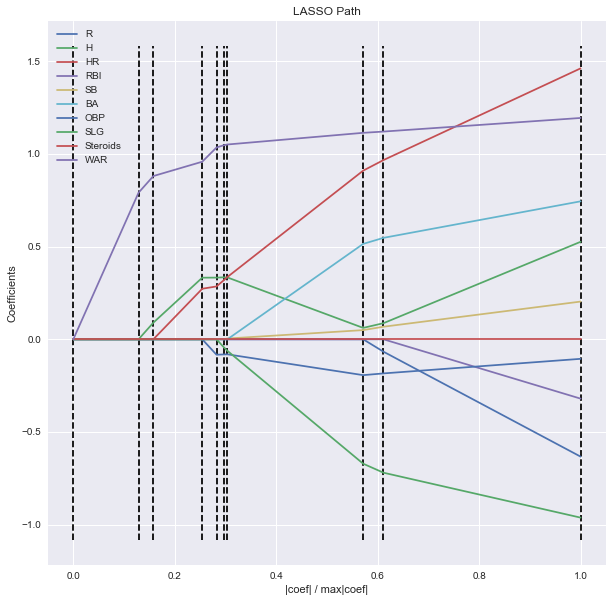

In [150]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

In [152]:
#Include all variables

X = hof_df_post_2000.loc[:,['R' , 'H' , 'HR' , 'RBI', 'SB', 'BA', 'OBP','SLG','Steroids','WAR']]

y = hof_df_post_2000['%vote_shift_transformed']

In [153]:
#Random state 15 for thurman munson
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=15)

In [154]:
## Scale the variables
std = StandardScaler()
#std.fit(X_train.values.astype(float))
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [155]:
X_tr = std.transform(X_train)

In [156]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso', verbose=True)

Computing regularization path using the LARS ...
.

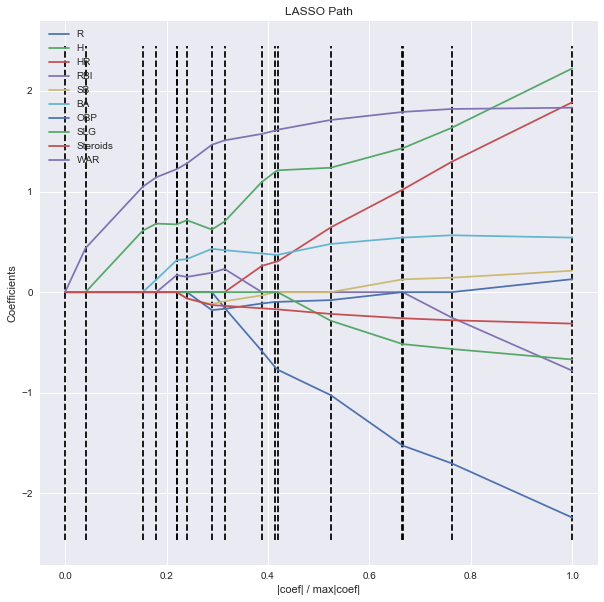

In [157]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()